In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import math
from matplotlib.ticker import ScalarFormatter
from pylab import figure

In [77]:
pip install ipywidgets
from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets

In [3]:
data = uproot.open("trackerspfit.root")
#data10= uproot.open("FASERnu1_1-10_muminus.root")

In [5]:
sp_track_x=data["spfit;1"]["sp_track_x"].array()
sp_track_y=data["spfit;1"]["sp_track_y"].array()
sp_track_z=data["spfit;1"]["sp_track_z"].array()
track_p0=data["spfit;1"]["track_p0"].array()
track_p1=data["spfit;1"]["track_p1"].array()
track_p2=data["spfit;1"]["track_p2"].array()
track_p3=data["spfit;1"]["track_p3"].array()
evtId=data["spfit;1"]["evtId"].array()
trackId=data["spfit;1"]["trackId"].array()
chi2=data["spfit;1"]["track_chi2"].array()

In [6]:
dataarr=np.array((evtId,trackId,sp_track_x,sp_track_y,sp_track_z,track_p0,track_p1,track_p2,track_p3,chi2)).T

In [7]:
def dataarr_has_num_of_tracks(num,dataarray):
    numarray=[]
    for i in range(len(dataarray[:,1])): # Check number of non-empty entries in trackId
        if len(dataarray[i,1][~np.isnan(dataarray[i,1])])==num:
            numarray.append(dataarray[i])
    return np.array(numarray).T

In [8]:
zerotracks=dataarr_has_num_of_tracks(0,dataarr)
#onetracks=dataarr_has_num_of_tracks(1,dataarr)
#twotracks=dataarr_has_num_of_tracks(2,dataarr)
#threetracks=dataarr_has_num_of_tracks(3,dataarr)

In [9]:
nozeros=dataarr[np.in1d(dataarr[:,0],zerotracks[0],invert=True)]

In [10]:
# Flatten data:
flat_trackId=np.hstack(nozeros[:,1])
flat_sp_track_x=np.hstack(nozeros[:,2])
flat_sp_track_y=np.hstack(nozeros[:,3])
flat_sp_track_z=np.hstack(nozeros[:,4])
flat_track_p0=np.hstack(nozeros[:,5])
flat_track_p1=np.hstack(nozeros[:,6])
flat_track_p2=np.hstack(nozeros[:,7])
flat_track_p3=np.hstack(nozeros[:,8])
flat_chi2=np.hstack(nozeros[:,9])

In [11]:
# make evtId the same length as other labels and flatten data:
evtIdarr=[]
for i in nozeros:
    temparr=[]
    for j in i[1]:
        temparr.append(i[0])
    temparr=np.array(temparr).T
    evtIdarr.append(temparr)
evtIdarr=np.array(evtIdarr).T
flat_evtId=np.hstack(evtIdarr)

In [12]:
flat_dataarr=np.array((flat_evtId,flat_trackId,flat_sp_track_x,flat_sp_track_y,flat_sp_track_z,flat_track_p0,flat_track_p1,flat_track_p2,flat_track_p3,flat_chi2)).T

In [13]:
#get the first spacepoints of each track:
track_sp1=np.zeros(shape=(int(len(flat_dataarr)/3),5))
j=0
for i in range(len(flat_dataarr)):
    if (i%3)==0:
        track_sp1[j][0]=flat_dataarr[i][2] # sp_x
        track_sp1[j][1]=flat_dataarr[i][3] # sp_y
        track_sp1[j][2]=flat_dataarr[i][4] # sp_z
        track_sp1[j][3]=flat_dataarr[i][6] # Tx
        track_sp1[j][4]=flat_dataarr[i][8] # Ty
        j+=1
#get the 2nd spacepoints of each track:
track_sp2=np.zeros(shape=(int(len(flat_dataarr)/3),3))
j=0
for i in range(len(flat_dataarr)):
    if (i%3)==1:
        track_sp2[j][0]=flat_dataarr[i][2] # sp_x
        track_sp2[j][1]=flat_dataarr[i][3] # sp_y
        track_sp2[j][2]=flat_dataarr[i][4] # sp_z
        j+=1
#get the 3rd spacepoints of each track:
track_sp3=np.zeros(shape=(int(len(flat_dataarr)/3),3))
j=0
for i in range(len(flat_dataarr)):
    if (i%3)==2:
        track_sp3[j][0]=flat_dataarr[i][2] # sp_x
        track_sp3[j][1]=flat_dataarr[i][3] # sp_y
        track_sp3[j][2]=flat_dataarr[i][4] # sp_z
        track_sp1[j][3]=flat_dataarr[i][6] # Tx
        track_sp1[j][4]=flat_dataarr[i][8] # Ty
        j+=1

Read Emulsion data


In [46]:
#Emulsion data extrapolated to IFT
# pre-process using PANDAS
area1_1 = pd.read_csv("chk_trks_area1-1_20220203.txt", sep='\s+', header=None)
area1_2 = pd.read_csv("chk_trks_area1-2_20220203.txt", sep='\s+', header=None)
area1_3 = pd.read_csv("chk_trks_area1-3_20220203.txt", sep='\s+', header=None)
area1_4 = pd.read_csv("chk_trks_area1-4_20220203.txt", sep='\s+', header=None)

combine = area1_1.append(area1_2, ignore_index=True)
combine = combine.append(area1_3, ignore_index=True)

emulsion = combine.append(area1_4, ignore_index=True)
emulsion.columns = ["t->ID", "plate_first", "plate_last", "x_last", "y_last", "z_last", 
                    "tx_last", "ty_last", "tx_pos", "ty_pos", "t->N()", "t->Npl()"]
emulsion_20 = emulsion[emulsion["plate_last"] == 20]

In [57]:
# Filter for large Tx, Ty
filter_txmin = emulsion_20[abs(emulsion_20["tx_last"]) > 0.1]

filter_tymin = filter_txmin[abs(filter_txmin["ty_last"]) > 0.1]

emulsion_pheri = filter_ymax

In [54]:
emulsion_20

t->ID  plate_first  plate_last    x_last   y_last  z_last  tx_last  \
4         1133           11          20   36792.7  10195.3     0.0   0.0214   
5         1229           11          20   40903.2  10267.5     0.0   0.0032   
6         1256           11          20   42117.5  10041.1     0.0   0.0118   
7         1284           11          20   41940.2  10029.5     0.0   0.0271   
8         1373           11          20   44306.5  10580.6     0.0   0.0102   
...        ...          ...         ...       ...      ...     ...      ...   
201377  104635           11          20   99630.2  89909.1     0.0   0.0133   
201378  104637           11          20  107504.5  89421.5     0.0   0.0077   
201379  104639           11          20  111570.5  88849.8     0.0   0.0114   
201380  104725           11          20   89414.9  89955.5     0.0  -0.0103   
201381  104749           11          20  111857.4  89985.7     0.0  -0.0055   

        ty_last  tx_pos  ty_pos  t->N()  t->Npl()  
4        0.0106  0.0083  0.0084       9        10  
5        0.0385  0.0001  0.0454       9        10  
6       -0.0137  0.0092 -0.0099       9        10  
7        0.0221  0.0169  0.0222       9        10  
8        0.0159  0.0092  0.0271       9        10  
...         ...     ...     ...     ...       ...  
201377  -0.0105  0.0139 -0.0120      10        10  
201378  -0.0092  0.0065 -0.0071       7        10  
201379  -0.0101  0.0114 -0.0121       9        10  
201380  -0.0217 -0.0086 -0.0171       8        10  
201381  -0.0087 -0.0045 -0.0074       9        10  

[166390 rows x 12 columns]

In [59]:
print(abs(emulsion_pheri["tx_last"]).min())
print(abs(emulsion_pheri["ty_last"]).min())
emulsion_pheri

0.1001
0.1002


t->ID  plate_first  plate_last    x_last   y_last  z_last  tx_last  \
1446      4096           11          20   54962.8  14849.1     0.0   0.1517   
3126      6516           11          20   46856.7  18858.7     0.0  -0.2542   
4136      7908           11          20   57643.3  15282.7     0.0  -0.1311   
4492      8512           11          20   29321.7  19805.5     0.0  -0.1478   
4722      8840           11          20   46554.8  18977.2     0.0   0.1156   
...        ...          ...         ...       ...      ...     ...      ...   
200845  101983           11          20   91201.8  85870.3     0.0  -0.1077   
200927  102166           11          20  111363.2  89062.5     0.0  -0.2150   
201017  103458           15          20  109110.9  81752.5     0.0   0.3944   
201111  103896           11          20   77384.6  77657.0     0.0  -0.1987   
201196  104266           11          20   80835.1  56572.3     0.0   0.2350   

        ty_last  tx_pos  ty_pos  t->N()  t->Npl()  
1446     0.1032  0.1424  0.0973      10        10  
3126     0.1023 -0.2612  0.1040       9        10  
4136    -0.4062 -0.1320 -0.4001       8        10  
4492    -0.1866 -0.1512 -0.1872      10        10  
4722    -0.1616  0.1131 -0.1581      10        10  
...         ...     ...     ...     ...       ...  
200845   0.6698 -0.1075  0.6719       7        10  
200927  -0.2206 -0.2158 -0.2207      10        10  
201017   0.2229  0.3895  0.2246       5         6  
201111   0.3186 -0.1978  0.3220       8        10  
201196   0.2185  0.2370  0.2187       9        10  

[1525 rows x 12 columns]

In [60]:
# Extrapolate 4 cm
# Calulation has been checked to be without errors
z_new = 40000  # (in mu_meters, gap from emulsion to IFT)
x_new = emulsion_pheri["tx_last"]*(z_new-emulsion_pheri["z_last"]) + emulsion_pheri["x_last"]
y_new = emulsion_pheri["ty_last"]*(z_new-emulsion_pheri["z_last"]) + emulsion_pheri["y_last"]


In [70]:
emulsion_extrap=emulsion_pheri
emulsion_extrap["z_last"]=z_new
emulsion_extrap["x_last"]=x_new
emulsion_extrap["y_last"]=y_new
emulsion_extrap

t->ID  plate_first  plate_last    x_last    y_last  z_last  tx_last  \
1446      4096           11          20   61030.8   18977.1   40000   0.1517   
3126      6516           11          20   36688.7   22950.7   40000  -0.2542   
4136      7908           11          20   52399.3    -965.3   40000  -0.1311   
4492      8512           11          20   23409.7   12341.5   40000  -0.1478   
4722      8840           11          20   51178.8   12513.2   40000   0.1156   
...        ...          ...         ...       ...       ...     ...      ...   
200845  101983           11          20   86893.8  112662.3   40000  -0.1077   
200927  102166           11          20  102763.2   80238.5   40000  -0.2150   
201017  103458           15          20  124886.9   90668.5   40000   0.3944   
201111  103896           11          20   69436.6   90401.0   40000  -0.1987   
201196  104266           11          20   90235.1   65312.3   40000   0.2350   

        ty_last  tx_pos  ty_pos  t->N()  t->Npl()  
1446     0.1032  0.1424  0.0973      10        10  
3126     0.1023 -0.2612  0.1040       9        10  
4136    -0.4062 -0.1320 -0.4001       8        10  
4492    -0.1866 -0.1512 -0.1872      10        10  
4722    -0.1616  0.1131 -0.1581      10        10  
...         ...     ...     ...     ...       ...  
200845   0.6698 -0.1075  0.6719       7        10  
200927  -0.2206 -0.2158 -0.2207      10        10  
201017   0.2229  0.3895  0.2246       5         6  
201111   0.3186 -0.1978  0.3220       8        10  
201196   0.2185  0.2370  0.2187       9        10  

[1525 rows x 12 columns]

In [170]:
columns=["x_last","y_last","z_last","tx_last","ty_last"]
emul_arr=emulsion_extrap[columns].to_numpy()
emul_arr[:,0]=emul_arr[:,0]/1000
emul_arr[:,1]=emul_arr[:,1]/1000
emul_arr[:,2]=emul_arr[:,2]/1000

In [181]:
print(max(abs(large_txy[:,3])))
print(max(abs(emul_arr[:,3])))

2.5210052823349
0.8003


In [182]:
print(min(abs(large_txy[:,3])))
print(min(abs(emul_arr[:,3])))

0.10650237977907795
0.1001


<font size="5">
    
-Draw vector field of extrapolated emulsion and IFT
    
</font>


<IPython.core.display.Javascript object>


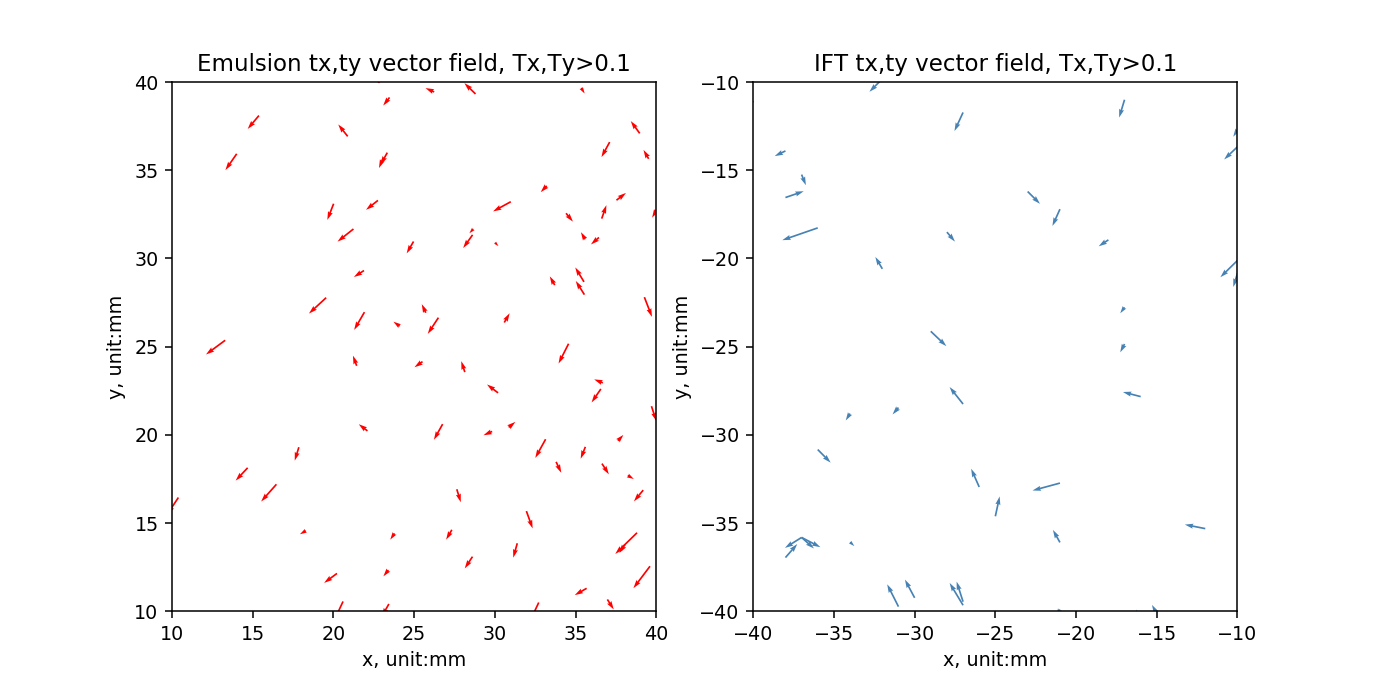

In [192]:
# Vector field of x,y with Tx,Ty>0.01:
%matplotlib notebook
fig,ax=plt.subplots(1,2,figsize=(10,5))
large_tx=track_sp1[abs(track_sp1[:,3])>0.1]
large_txy=large_tx[abs(large_tx[:,4])>0.1]

ax[1].quiver(large_txy[:,0], large_txy[:,1],large_txy[:,3], large_txy[:,4], color='steelblue', units='xy',scale=0.5,width=0.1)
ax[1].set_title('IFT tx,ty vector field, Tx,Ty>0.1')
ax[1].set_xlabel('x, unit:mm')
ax[1].set_ylabel('y, unit:mm')

ax[1].set_xlim(-40,-10)
ax[1].set_ylim(-40,-10)


ax[0].quiver(emul_arr[:,0], emul_arr[:,1],emul_arr[:,3], emul_arr[:,4], color='red',units='xy',scale=0.5,width=0.1)
ax[0].set_title('Emulsion tx,ty vector field, Tx,Ty>0.1')
ax[0].set_xlabel('x, unit:mm')
ax[0].set_ylabel('y, unit:mm')

ax[0].set_xlim(10,40)
ax[0].set_ylim(10,40)


#plt.savefig('Scatterplot of x and y large tx ty')
plt.show()